In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')

daily_usage_hours = df['Daily_Usage_Hours'].values

print(type(daily_usage_hours))  
print(daily_usage_hours[:10])   


<class 'numpy.ndarray'>
[4.  5.5 5.8 3.1 2.5 3.9 6.3 5.1 3.  3.9]


Среднее: 5.020666666666667
Дисперсия: 3.827895520729132
Мода: 4.4
Медиана: 5.0
Квантили (0.25, 0.5, 0.75): (np.float64(3.7), np.float64(5.0), np.float64(6.4))
Эксцесс: -0.1226141759584718
Асимметрия: 0.016197292999157842
Интерквартильный размах: 2.7


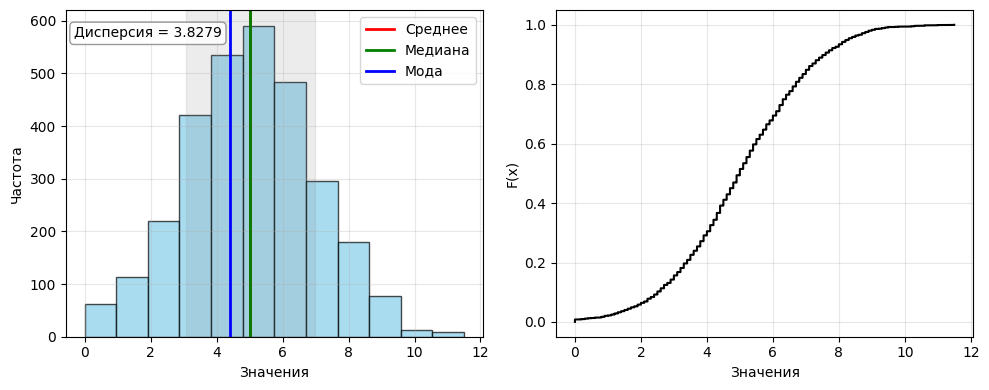

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def analyze_and_plot_with_stats(data):
    data = np.asarray(data)

    mean_val = np.mean(data)
    var_val = np.var(data, ddof=1)            
    std_val  = np.sqrt(var_val)               
    mode_res = stats.mode(data, keepdims=True)
    mode_val = mode_res.mode[0]
    median_val = np.median(data)
    q25, q50, q75 = np.quantile(data, [0.25, 0.5, 0.75])
    excess_kurtosis = stats.kurtosis(data)
    skewness = stats.skew(data)
    iqr = stats.iqr(data)

    print("Среднее:", mean_val)
    print("Дисперсия:", var_val)
    print("Мода:", mode_val)
    print("Медиана:", median_val)
    print("Квантили (0.25, 0.5, 0.75):", (q25, q50, q75))
    print("Эксцесс:", excess_kurtosis)
    print("Асимметрия:", skewness)
    print("Интерквартильный размах:", iqr)


    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)

    n = len(data)
    bins = 1 + int(np.log2(n))

    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7, color="skyblue")

    plt.axvline(mean_val,   linewidth=2, color='red',   label='Среднее')
    plt.axvline(median_val, linewidth=2, color='green', label='Медиана')
    plt.axvline(mode_val,   linewidth=2, color='blue',  label='Мода')

    plt.axvspan(mean_val - std_val, mean_val + std_val, alpha=0.15, color="gray")
    plt.text(0.02, 0.95, f"Дисперсия = {var_val:.4f}",
             transform=plt.gca().transAxes, va='top', ha='left',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.xlabel("Значения")
    plt.ylabel("Частота")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.subplot(1,2,2)
    sorted_vals = np.sort(data)
    y = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
    plt.step(sorted_vals, y, where="post", color="black")
    plt.xlabel("Значения")
    plt.ylabel("F(x)")
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

analyze_and_plot_with_stats(daily_usage_hours)


Выводы: В среднем подростки тратят около 5 часов в день на использование телефона. Наблюдается умеренный разброс значений (дисперсия = 3.83). Основная масса значений сосредоточена между 3.7 и 6.4 часами (интерквартильный размах = 2.7 часа).

Тот факт, что мода равна 4.4 часа, а среднее значение составляет 5.02 часа, указывает на то, что наиболее часто встречающееся время использования немного меньше среднего. При этом медиана (5.0 часа) практически совпадает со средним значением, что свидетельствует о симметричном распределении данных.

Эксцесс = -0.12 показывает, что распределение практически не отличается от нормального по остроте пика, с очень незначительным уплощением.

Асимметрия = +0.016 означает практически идеальную симметрию распределения. Очень слабый положительный сдвиг указывает на минимальное превышение значений выше среднего.


Хи-квадрат статистика: 23.16855232705958
Критическое значение (alpha=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = 0.0162, SE = 0.0447
Эксцесс    = -0.1226, SE = 0.0894
Гипотеза о нормальности: не отвергается 
Q-Q Plot


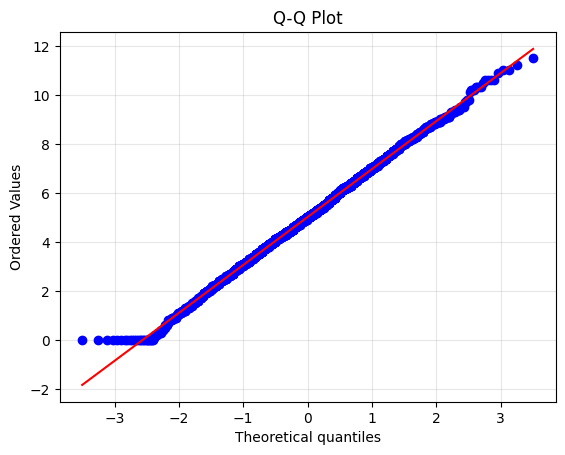

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def test_normality(data):

    n = len(data)
    mu, sigma = np.mean(data), np.std(data, ddof=1)

    # критерий согласия
    k = 1 + int(np.log2(n))
    observed, bin_edges = np.histogram(data, bins=k)

    cdf_vals = stats.norm.cdf(bin_edges, loc=mu, scale=sigma)
    expected_probs = np.diff(cdf_vals)
    expected = n * expected_probs

    chi2_stat = np.sum((observed - expected)**2 / expected)
    df_chi2 = k - 1 - 2  
    alpha = 0.05
    chi2_crit = stats.chi2.ppf(1 - alpha, df_chi2)

    
    print("Хи-квадрат статистика:", chi2_stat)
    print("Критическое значение (alpha=0.05):", chi2_crit)
    print("Гипотеза о нормальности:", " не отвергается" if chi2_stat < chi2_crit else " отвергается")

    # Критерий асимметрии и эксцесса
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data)

    se_skew = np.sqrt(6/n)
    se_kurt = np.sqrt(24/n)

    print("\nАсимметрия и эксцесс")
    print(f"Асимметрия = {skew_val:.4f}, SE = {se_skew:.4f}")
    print(f"Эксцесс    = {kurt_val:.4f}, SE = {se_kurt:.4f}")

    if abs(skew_val) < 2*se_skew and abs(kurt_val) < 2*se_kurt:
        print("Гипотеза о нормальности: не отвергается ")
    else:
        print("Гипотеза о нормальности: отвергается ")

    # Q-Q Plot
    print("Q-Q Plot")
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.grid(alpha=0.3)
    plt.show()

test_normality(daily_usage_hours)




По графику Q-Q plot видим что на начальном промежутке распраделение отклоняется от нормального. 

Стандартизация
Среднее: -2.0250467969162856e-16
Дисперсия: 1.0003334444814937
Мода: -0.3172859043046986
Медиана: -0.01056483677061852
Квантили (0.25, 0.5, 0.75): (np.float64(-0.6751271497611256), np.float64(-0.01056483677061852), np.float64(0.7051176541422356))
Эксцесс: -0.12261417595847046
Асимметрия: 0.016197292999158366
Интерквартильный размах: 1.3802448039033612


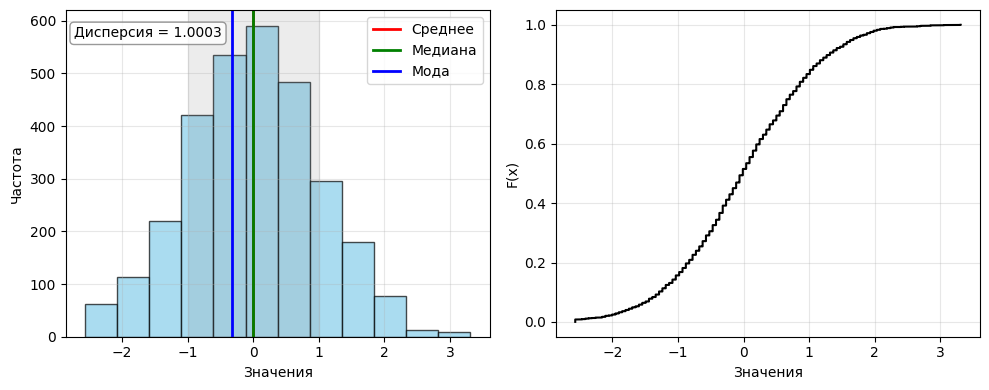

Хи-квадрат статистика: 23.16855232705891
Критическое значение (alpha=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = 0.0162, SE = 0.0447
Эксцесс    = -0.1226, SE = 0.0894
Гипотеза о нормальности: не отвергается 
Q-Q Plot


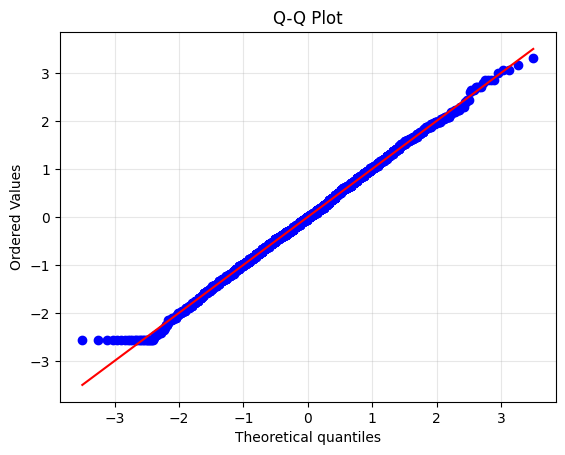

Логарифмирование
Среднее: 1.7303640591478107
Дисперсия: 0.1516790141822664
Мода: 1.6863989535702288
Медиана: 1.791759469228055
Квантили (0.25, 0.5, 0.75): (np.float64(1.547562508716013), np.float64(1.791759469228055), np.float64(2.0014800002101243))
Эксцесс: 3.3140031386940025
Асимметрия: -1.3854656164474843
Интерквартильный размах: 0.4539174914941113


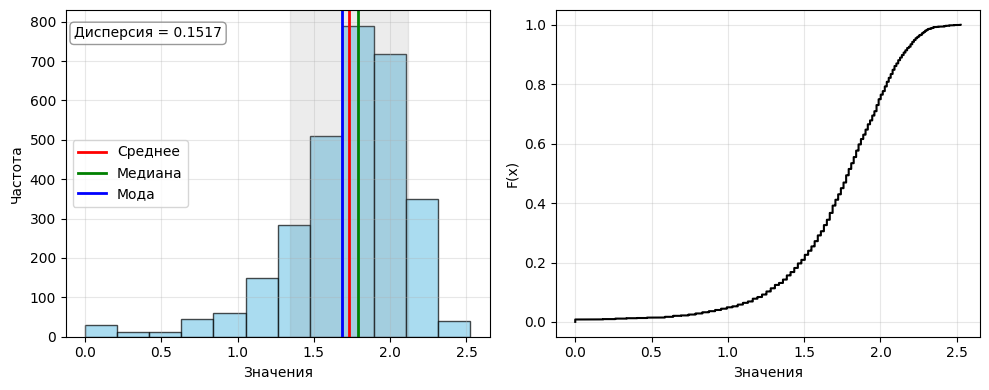

Хи-квадрат статистика: 6848.255237078807
Критическое значение (alpha=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = -1.3855, SE = 0.0447
Эксцесс    = 3.3140, SE = 0.0894
Гипотеза о нормальности: отвергается 
Q-Q Plot


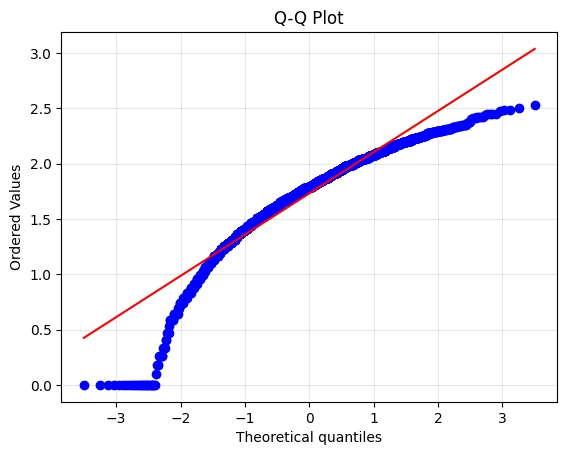

Удаление выбросов
Исходный размер: 3000
Размер после удаления выбросов: 2990
Удалено наблюдений: 10
Границы выбросов: [-0.35, 10.45]
Среднее: 5.001170568561873
Дисперсия: 3.7263117775209214
Мода: 4.4
Медиана: 5.0
Квантили (0.25, 0.5, 0.75): (np.float64(3.7), np.float64(5.0), np.float64(6.3))
Эксцесс: -0.2390768769235776
Асимметрия: -0.04571723053925987
Интерквартильный размах: 2.5999999999999996


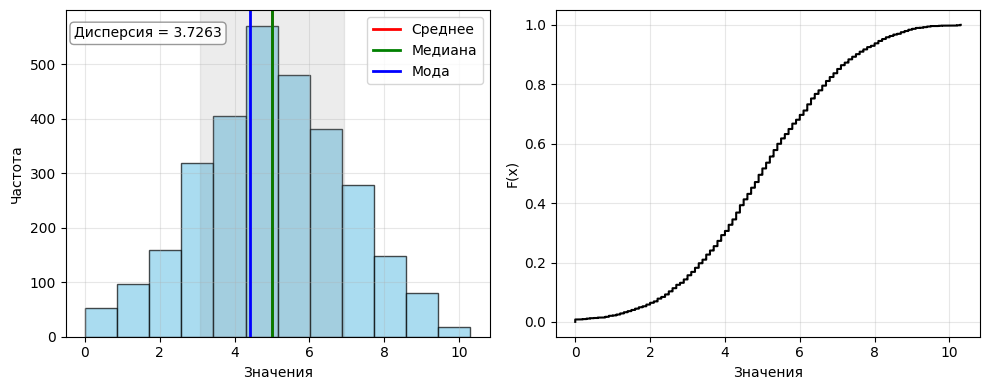

Хи-квадрат статистика: 32.359862702104316
Критическое значение (alpha=0.05): 16.918977604620448
Гипотеза о нормальности:  отвергается

Асимметрия и эксцесс
Асимметрия = -0.0457, SE = 0.0448
Эксцесс    = -0.2391, SE = 0.0896
Гипотеза о нормальности: отвергается 
Q-Q Plot


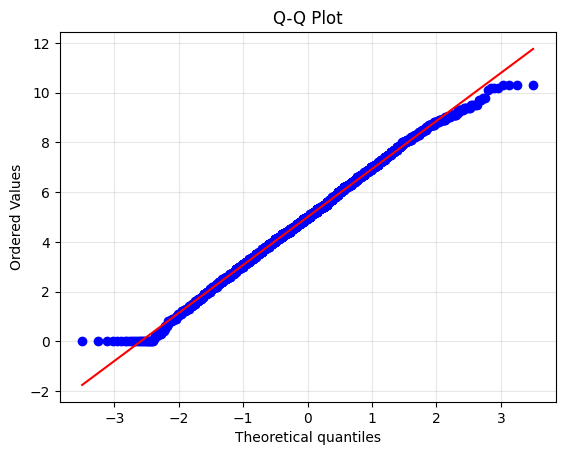

In [25]:
# Стандартизация
standardized = stats.zscore(daily_usage_hours)

print("Стандартизация")
analyze_and_plot_with_stats(standardized)
test_normality(standardized)

# Логарифмирование 
log_transformed = np.log1p(daily_usage_hours)  

print("Логарифмирование")
analyze_and_plot_with_stats(log_transformed)
test_normality(log_transformed)

# Удаление, усечение выбросов
print("Удаление выбросов")

def remove_outliers_iqr(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Фильтрация данных
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    print(f"Исходный размер: {len(data)}")
    print(f"Размер после удаления выбросов: {len(filtered_data)}")
    print(f"Удалено наблюдений: {len(data) - len(filtered_data)}")
    print(f"Границы выбросов: [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    return filtered_data

# Удаляем выбросы
outliers_removed = remove_outliers_iqr(daily_usage_hours)

# Анализ данных без выбросов
analyze_and_plot_with_stats(outliers_removed)
test_normality(outliers_removed)



стандартизация не привела к изменениям, логарифмирование и усечение выбросов не помогло привести к нормальному.

Средние и дисперсии по классам
                  mean       var
School_Grade                    
10th          4.977618  3.812605
11th          5.061795  3.635211
12th          4.936862  3.735589
7th           5.077062  3.883344
8th           5.066390  4.009513
9th           5.012167  3.912652 



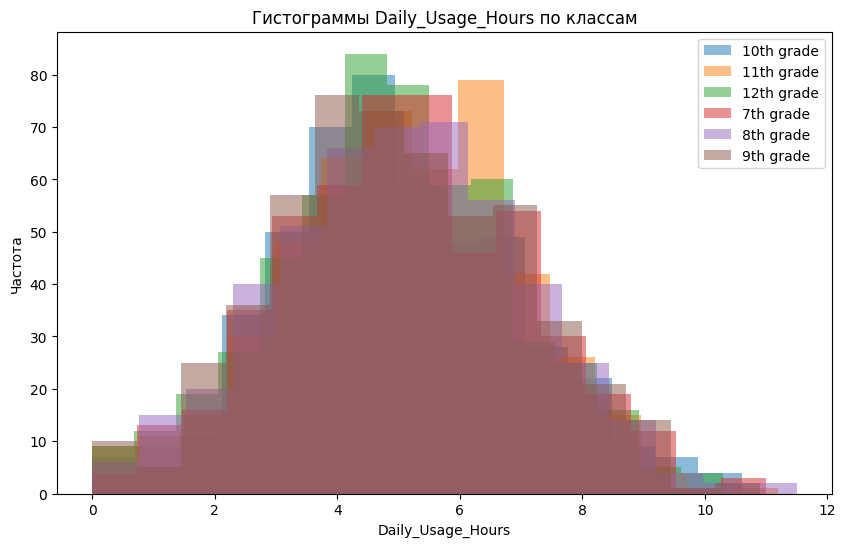

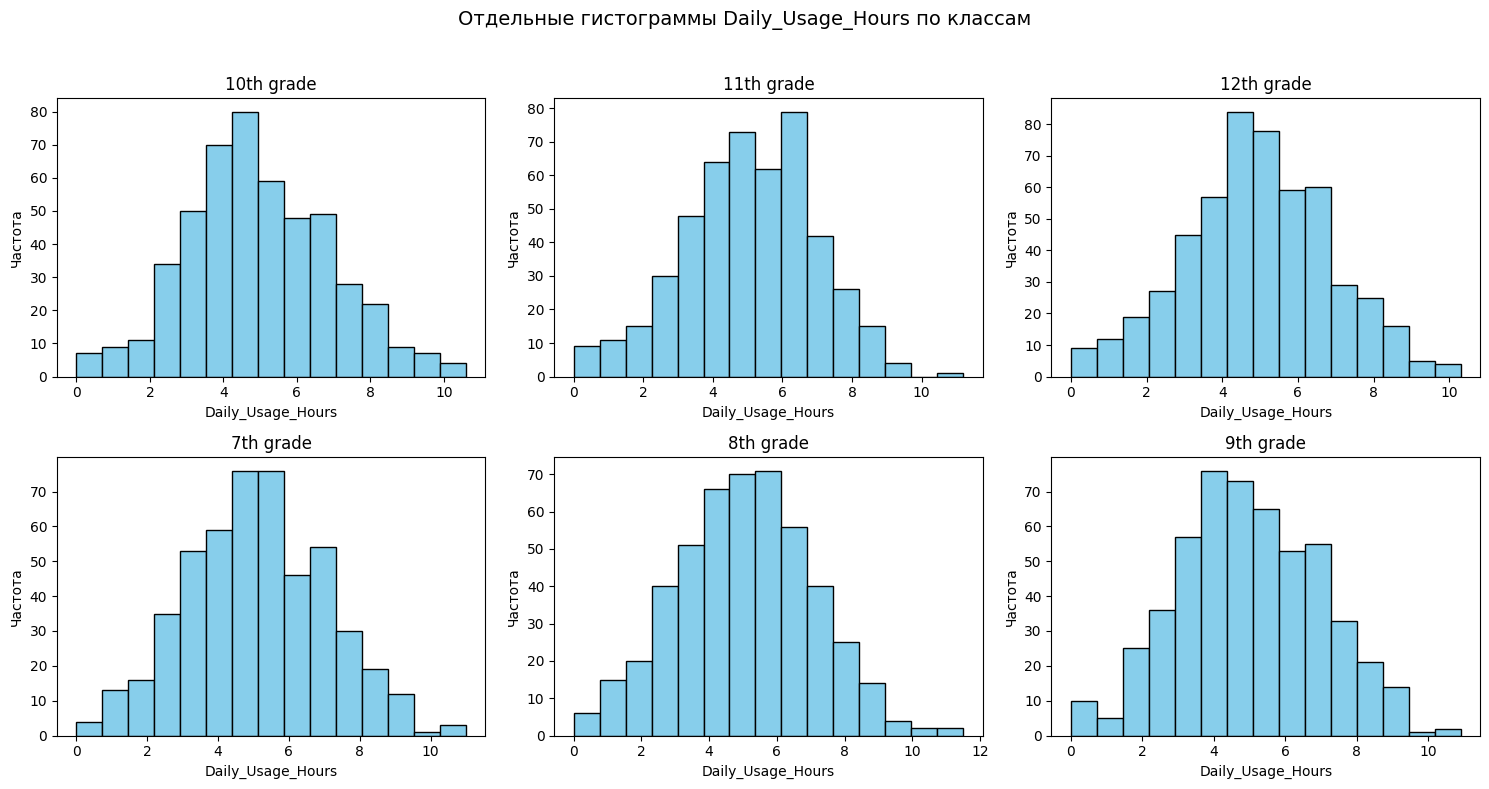

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')

groups = df.groupby("School_Grade")["Daily_Usage_Hours"]


stats_by_grade = groups.agg(["mean", "var"])
print("Средние и дисперсии по классам")
print(stats_by_grade, "\n")


plt.figure(figsize=(10,6))
for grade, values in groups:
    plt.hist(values, bins=15, alpha=0.5, label=f"{grade} grade")

plt.title("Гистограммы Daily_Usage_Hours по классам")
plt.xlabel("Daily_Usage_Hours")
plt.ylabel("Частота")
plt.legend()
plt.show()


grades = sorted(df["School_Grade"].unique())
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  

for ax, grade in zip(axes.ravel(), grades):
    values = df[df["School_Grade"] == grade]["Daily_Usage_Hours"]
    ax.hist(values, bins=15, color="skyblue", edgecolor="black")
    ax.set_title(f"{grade} grade")
    ax.set_xlabel("Daily_Usage_Hours")
    ax.set_ylabel("Частота")

plt.suptitle("Отдельные гистограммы Daily_Usage_Hours по классам", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()